In [ ]:
from PartOne import *
import numpy as np
import pandas
import matplotlib.pyplot as plt

In [ ]:
def read_trajectories(path: str) -> 'ndarry':
  """Input:
     path -> string of the csv file path

     Output:
     ndarray with shape(x, y)

     import pandas and numpy are required
  """

  Data_temp = pandas.read_csv(path)
  return np.array(Data_temp)



In [ ]:
Data_Highway1 = pandas.read_csv("/content/highway.csv")

In [ ]:
Data_Highway = read_trajectories("/content/highway.csv")

In [ ]:
Data_Highway1

,id,x,y,lane
0,0,4.585165,52.366171,4
1,0,8.392308,52.932288,4
2,0,9.224868,50.995742,4
3,0,11.463425,47.142148,4
4,0,15.415455,50.746214,4
...,...,...,...,...
13740,799,50.559158,30.123171,2
13741,799,53.750748,27.187805,2
13742,799,53.287687,28.116916,2
13743,799,58.189428,27.430886,2


In [ ]:
def center_trajectories(traj_list: list, distance_func) -> "trajectories":
  """Input:
     traj_list -> ndarray of trajectories with shape(m, n, 4)
     m is the number of trajectories in this ndarray
     trajectories are represented by ndarray of shape (n, 4) where n represents 
     the number of points and 4 represents id, x, y, lane coordinates

     Output:
     ndarray with shape(n, 4)

     import pandas and numpy are required
  """
  #traj_list = traj_set.tolist(traj_set)
  traj_list_size = len(traj_list)
  distances = np.zeros(traj_list_size)

  for i in range(traj_list_size):
    for j in range(traj_list_size):
      distances[i] += distance_func(traj_list[i], traj_list[j])[0]
  
  return traj_list[np.argmin(distances)], np.argmin()

In [ ]:
mask1 = Data_Highway[:, 3] == 1
test1 = Data_Highway[mask1,:]

mask2 = Data_Highway[:, 3] == 2
test2 = Data_Highway[mask2, 0:3]


In [ ]:
list1 = []
for i in set(test1[:,0]):
  list1.append(test1[test1[:,0]==i])
list1 = np.array(list1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


In [ ]:
center_trajectories(list1, dtw)

array([[397.        ,   3.97992912,  16.3024658 ,   1.        ],
       [397.        ,   6.35577852,  13.79279078,   1.        ],
       [397.        ,  11.77868208,  13.87096016,   1.        ],
       [397.        ,  15.86938185,  13.88128145,   1.        ],
       [397.        ,  21.17234997,  14.53551943,   1.        ],
       [397.        ,  26.38300274,  12.71716338,   1.        ],
       [397.        ,  33.26750171,  16.23979651,   1.        ],
       [397.        ,  32.99427216,  14.08051908,   1.        ],
       [397.        ,  36.82095375,  16.43959247,   1.        ],
       [397.        ,  40.49003622,  17.95948126,   1.        ],
       [397.        ,  43.25157573,  15.44243678,   1.        ],
       [397.        ,  49.84585588,  14.41102281,   1.        ],
       [397.        ,  52.73320144,  15.86388987,   1.        ],
       [397.        ,  58.07915697,  13.28787108,   1.        ],
       [397.        ,  62.75034195,  15.09160331,   1.        ],
       [397.        ,  62

In [ ]:
len(list1)

100

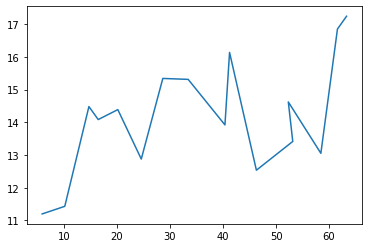

In [ ]:
plt.plot(list1[0][:, 1], list1[0][:, 2])

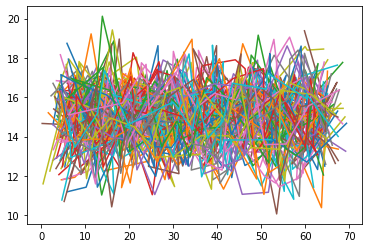

In [ ]:
for i in list1:
  plt.plot(i[:, 1], i[:, 2])
plt.show()

In [ ]:
def n_average_trajectories(traj_list: list, h:int) -> "trajectories":
  """Input:
     traj_list -> ndarray of trajectories with shape(m, n, 4)
     m is the number of trajectories in this ndarray
     trajectories are represented by ndarray of shape (n, 4) where n represents 
     the number of points and 4 represents id, x, y, lane coordinates
    
     h -> the number of points representing the n average trajectories

     Output:
     ndarray with shape(h, 2)

     import pandas and numpy are required
  """
  #traj_list = traj_set.tolist(traj_set)
  traj_list_size = len(traj_list)

  h_average_traj = np.zeros((h, 2))

  for i in range(h):   
    curr_x_added = 0
    curr_y_added = 0
    for j in range(traj_list_size):
      arc_length = get_arc_length(traj_list[j])
      curr_x = (i+1) / h
      curr_remaining_arc_length = curr_x * arc_length
      #curr_remaining_arc_length = curr_x
      print("arc_lenth", curr_x, curr_remaining_arc_length)
      for p in range(len(traj_list[j]) - 1):
        #(traj_list[j][p][1] <= curr_x * ).all() and (traj_list[j][p+1][1] >= curr_x).all()
        line_seg_arc_length = np.sqrt(euclidean_square(traj_list[j][p][1:3], traj_list[j][p+1][1:3]))
        curr_remaining_arc_length -= line_seg_arc_length
        print("curr_remain", p, curr_remaining_arc_length)
        if curr_remaining_arc_length <= 1e-4 :

          curr_remaining_arc_length += line_seg_arc_length
          proportion = curr_remaining_arc_length / line_seg_arc_length
          #find the equation          
          coefficients = np.polyfit(traj_list[j][p:p+2, 1:3].T[0], traj_list[j][p:p+2, 1:3].T[1], 1)
          polynomial = np.poly1d(coefficients)
          #get the y value
          x1 = traj_list[j][p:p+2, 1:3].T[0][1]
          x2 = traj_list[j][p:p+2, 1:3].T[0][0]
          x_length = np.abs(x1 - x2)
          curr_x = np.minimum(x1, x2) + x_length*proportion
          curr_y_added += polynomial(curr_x)
          curr_x_added += curr_x
          print(curr_x_added)
          break
    
    curr_y_added = curr_y_added / traj_list_size
    curr_x_added = curr_x_added / traj_list_size
    h_average_traj[i][0] = curr_x_added
    h_average_traj[i][1] = curr_y_added
  
  return h_average_traj



In [ ]:
def get_arc_length(trajectory) -> int:
  arc_length = 0
  for i in range(len(trajectory)-1):
    arc_length += np.sqrt(euclidean_square(trajectory[i][1:3], trajectory[i+1][1:3]))
  return arc_length

In [ ]:
list1_test = list1[0].copy()
small_test = list1_test[:2, :]
small_test[0][2] = 5.8960606
small_test[1][2] = 10.16242812
print(small_test)
np.sqrt(get_arc_length(small_test))

[[ 5.          5.8960606   5.8960606   1.        ]
 [ 5.         10.16242812 10.16242812  1.        ]]


6.033554814190443

In [ ]:
small_test[0:3, 1:3].T[0]

array([[ 5.8960606 , 10.16242812],
       [ 5.8960606 , 10.16242812]])

In [ ]:
c = np.polyfit(small_test[0:3, 1:3].T[0], small_test[0:3, 1:3].T[1], 1)

In [ ]:
polynomial = np.poly1d(c)

In [ ]:
np.polyfit([100,100], [200,200], 1)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


array([  1., 100.])

In [ ]:
y_axis = polynomial(10.16242812)
print(y_axis)

10.16242811737173


In [ ]:
list1[0:2]

array([array([[ 5.        ,  5.8960606 , 11.19921242,  1.        ],
       [ 5.        , 10.16242812, 11.43158779,  1.        ],
       [ 5.        , 14.71321479, 14.48058625,  1.        ],
       [ 5.        , 16.46747353, 14.08359399,  1.        ],
       [ 5.        , 20.16505974, 14.3877125 ,  1.        ],
       [ 5.        , 24.58838775, 12.87658329,  1.        ],
       [ 5.        , 28.65135402, 15.34068367,  1.        ],
       [ 5.        , 33.43515413, 15.31196098,  1.        ],
       [ 5.        , 40.36858937, 13.92042258,  1.        ],
       [ 5.        , 41.23905658, 16.13664265,  1.        ],
       [ 5.        , 46.3013349 , 12.53529688,  1.        ],
       [ 5.        , 53.16012169, 13.41478046,  1.        ],
       [ 5.        , 52.32155026, 14.62250731,  1.        ],
       [ 5.        , 58.46022552, 13.05233905,  1.        ],
       [ 5.        , 61.58793809, 16.84988249,  1.        ],
       [ 5.        , 63.30178227, 17.24193698,  1.        ]]),
       array([[

In [ ]:
list1[0].shape

(16, 4)

In [ ]:
print(np.sqrt(get_arc_length(list1[0])))
n_average_trajectories(list1[:2], 2)

8.156832306014508
arc_lenth 0.5 33.266956634220975
curr_remain 0 28.99426542213484
curr_remain 1 23.51648750382534
curr_remain 2 21.71786953608188
curr_remain 3 18.007797862015458
curr_remain 4 13.333469868634037
curr_remain 5 8.581682252198721
curr_remain 6 3.7977959130310524
curr_remain 7 -3.27390142854272
37.15869753536725
arc_lenth 0.5 37.40587306248906
curr_remain 0 30.901478282996862
curr_remain 1 29.6840759116034
curr_remain 2 24.110736655214637
curr_remain 3 20.90650447654884
curr_remain 4 10.60545546723604
curr_remain 5 5.892977813220664
curr_remain 6 1.3968459339616492
curr_remain 7 -0.7372898662900922
68.6106016519739
arc_lenth 1.0 66.53391326844195
curr_remain 0 62.26122205635582
curr_remain 1 56.78344413804632
curr_remain 2 54.98482617030286
curr_remain 3 51.27475449623643
curr_remain 4 46.600426502855015
curr_remain 5 41.8486388864197
curr_remain 6 37.06475254725203
curr_remain 7 29.993055205678253
curr_remain 8 27.61201666488023
curr_remain 9 21.399420331184125
curr_rema

array([[34.30530083, 14.24441874],
       [62.55296865, 16.19553825]])